In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 进行数据导入

companies_data = pd.read_excel(io='companies.xls', sheet_name=0)

In [3]:
companies_data.head(10)

,ASSET,LIBITY,CASSET,CLIBITY,CASH,SREVENUE,SPROFIT,NPROFIT,RECEIVAB,MAINCOST,INVENTRY,LOAN,INTEREST,RATING
0,1.547336e+10,1.059925e+10,6.835456e+09,3.197114e+09,2.039102e+09,1.641898e+10,4.895354e+09,7.454865e+08,8.873680e+07,1.152363e+10,2.860091e+09,3.636876e+09,1.852834e+08,1
1,5.680612e+10,3.970748e+10,2.085414e+10,1.668331e+10,1.289789e+10,3.511169e+09,1.814890e+09,7.598296e+08,2.265957e+09,1.696280e+09,8.692615e+08,1.561541e+09,7.700409e+07,1
2,8.345341e+09,5.833393e+09,8.047869e+08,6.438295e+08,7.675127e+08,2.031876e+09,1.407197e+09,8.709336e+08,0.000000e+00,6.246784e+08,2.157535e+08,4.623853e+08,2.280155e+07,1
3,7.926957e+09,4.439096e+09,1.679505e+09,2.362389e+09,4.172194e+08,1.187910e+09,5.533089e+08,1.284279e+08,1.136382e+09,6.346015e+08,2.667839e+07,2.764960e+09,1.363481e+08,1
4,9.596428e+10,6.573553e+10,3.248151e+10,3.089705e+10,3.929240e+09,2.166234e+10,2.408890e+09,9.145913e+08,2.869013e+09,1.925345e+10,6.586292e+09,1.765877e+10,8.996395e+08,1
5,6.329863e+10,4.335956e+10,8.042116e+09,1.461258e+10,1.901062e+09,2.683185e+10,5.915800e+09,3.175083e+09,3.269928e+09,2.091605e+10,1.540905e+09,2.362876e+10,1.203785e+09,1
6,7.873401e+09,5.393280e+09,5.699675e+08,2.341210e+09,5.593455e+08,8.910332e+08,5.780460e+08,3.555754e+08,0.000000e+00,3.129872e+08,2.616537e+07,1.211009e+09,6.169577e+07,1
7,2.432424e+10,1.666210e+10,1.041738e+10,7.579921e+09,2.737957e+09,1.753313e+10,1.162659e+09,7.667492e+08,5.307126e+07,1.637047e+10,4.213021e+09,4.756771e+09,2.423373e+08,1
8,8.137729e+08,2.909524e+08,4.783448e+08,2.907972e+08,8.418496e+07,5.963979e+08,4.163151e+07,7.056628e+06,6.136065e+07,2.442264e+08,1.442264e+08,7.091970e+07,2.873910e+06,3
9,1.707652e+10,1.169742e+10,2.196964e+09,1.447596e+09,7.088404e+08,1.102394e+09,6.967291e+08,5.776337e+08,1.136930e+09,4.056649e+08,2.384750e+07,8.292707e+08,4.089373e+07,1


In [4]:
# 根据银监会贷款风险分级，RATING共分为5级，现将标记为1、2的企业认定为非违约级，3、4、5认定为违约级
# 进行标签和特征值分离

companies_data['label'] = 1
companies_data['label'][companies_data['RATING']==1] = 0
companies_data['label'][companies_data['RATING']==2] = 0
data_label = companies_data['label']
data_features = companies_data.drop(labels=['RATING', 'label'], axis=1)

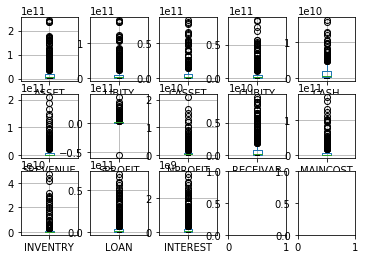

In [5]:
# 进行探索性分析

fig, axe = plt.subplots(nrows=3, ncols=5)
i = 0
for col_name in data_features.columns:
    data_features.boxplot(column=col_name, ax=axe[i//5][i%5], figsize=(10,10))
    i += 1 

# 可以看到极端值比较多，但是由于这已经是有效数据，所以不存在由于收集等因素导致的不正常极端值，故只做观察不做处理

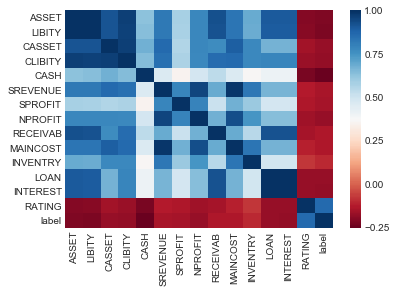

In [6]:
sns.set_style('whitegrid')
sns.heatmap(data=companies_data.corr(), cmap=sns.color_palette('RdBu', n_colors=200)) 

# 可以得到虽然标签和其他特征无显著关系，但是一些特征之间存在较强相关性，可以减少特征以降维

In [7]:
# 其他极值、均值等描述性统计量因为与研究问题相关性不强，暂时不做观察

# 进行指标的建立
# 由于都是财务报表中的指标，由于公司之间体量差别较大，所以单看绝对值无法获得有效结果，故查看相关财务比率

data = pd.DataFrame(columns=['x%s' % i for i in range(1,19)])
data['x1'] = data_features['LIBITY'] / data_features['ASSET'] # 总负债/总资产
data['x2'] = data_features['SREVENUE'] / data_features['INTEREST'] # 销售收入/利息费用
data['x3'] = data_features['CASSET'] / data_features['CLIBITY'] # 流动资产/流动负债
data['x4'] = data_features['NPROFIT'] / (data_features['ASSET'] - data_features['LIBITY']) # 净利润/净资产
data['x5'] = data_features['SREVENUE'] / data_features['CASH'] # 销售收入/现金
data['x6'] = np.log(data_features['ASSET']) # 总资产的对数
data['x7'] = data_features['SREVENUE'] / data_features['ASSET'] # 销售收入/总资产
data['x8'] = data_features['SPROFIT'] / data_features['ASSET'] # 销售利润/总资产
data['x9'] = (data_features['SREVENUE'] - data_features['SPROFIT']) / data_features['SPROFIT'] # 销售成本/销售收入
data['x10'] = (data_features['RECEIVAB'] + data_features['INVENTRY']) / (data_features['ASSET'] - data_features['LIBITY']) # (应收账款+存货)/净资产
data['x11'] = data_features['INVENTRY'] / (data_features['ASSET'] - data_features['LIBITY']) # 存货/净资产
data['x12'] = data_features['SREVENUE'] / data_features['LIBITY'] # 销售收入/总负债
data['x13'] = data_features['CASSET'] / (data_features['ASSET'] - data_features['LIBITY']) # 流动资产/净资产
data['x14'] = data_features['SPROFIT'] / data_features['INTEREST'] # 销售利润/利息费用
data['x15'] = data_features['SREVENUE'] / data_features['CASSET'] # 销售收入/流动资产
data['x16'] = data_features['SREVENUE'] / (data_features['ASSET'] - data_features['LIBITY']) # 销售收入/净资产
data['x17'] = data_features['CASSET'] / data_features['INTEREST'] # 流动资产/利息费用
data['x18'] = data_features['MAINCOST'] / data_features['SREVENUE'] # 主营业务成本/销售收入
y = data_label

In [8]:
data.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0.685000,88.615529,2.138008,0.152948,8.052067,23.462385,1.061113,0.316373,2.353993,0.604998,0.586793,1.549070,1.402402,26.420905,2.402032,3.368613,36.891905,0.701848
1,0.699000,45.597179,1.250000,0.044438,0.272228,24.762910,0.061810,0.031949,0.934646,0.183361,0.050838,0.088426,1.219637,23.568743,0.168368,0.205348,270.818555,0.483110
2,0.699000,89.111301,1.250000,0.346716,2.647351,22.844969,0.243474,0.168621,0.443917,0.085891,0.085891,0.348318,0.320384,61.714986,2.524738,0.808885,35.295269,0.307439
3,0.560000,8.712333,0.710935,0.036821,2.847208,22.793535,0.149857,0.069801,1.146921,0.333459,0.007649,0.267602,0.481528,4.058060,0.707298,0.340584,12.317767,0.534217
4,0.685000,24.078909,1.051282,0.030256,5.513112,25.287242,0.225733,0.025102,7.992666,0.312792,0.217882,0.329538,1.074524,2.677616,0.666913,0.716614,36.105030,0.888798
5,0.685000,22.289575,0.550356,0.159239,14.114138,24.871129,0.423893,0.093459,3.535625,0.241277,0.077281,0.618822,0.403335,4.914334,3.336417,1.345692,6.680693,0.779523
6,0.685000,14.442370,0.243450,0.143370,1.592992,22.786756,0.113170,0.073418,0.541457,0.010550,0.010550,0.165212,0.229814,9.369297,1.563305,0.359270,9.238355,0.351263
7,0.685000,72.350120,1.374338,0.100070,6.403729,23.914739,0.720809,0.047798,14.080204,0.556776,0.549850,1.052276,1.359592,4.797688,1.683066,2.288283,42.987096,0.933688
8,0.357535,207.521430,1.644943,0.013497,7.084376,20.517192,0.732880,0.051159,13.325637,0.393227,0.275862,2.049813,0.914931,14.486017,1.246795,1.140732,166.443914,0.409502
9,0.685000,26.957534,1.517664,0.107385,1.555208,23.560970,0.064556,0.040800,0.582242,0.215794,0.004433,0.094243,0.408426,17.037555,0.501781,0.204940,53.723747,0.367985


In [9]:
# 进行训练数据集和验证数据集的拆分

from sklearn.model_selection import train_test_split

train_temp, test_temp, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=13)
X_train = train_temp.copy()
X_test = test_temp.copy()
train = train_temp.copy()
test = test_temp.copy()
train['label'] = y_train
test['label'] = y_test

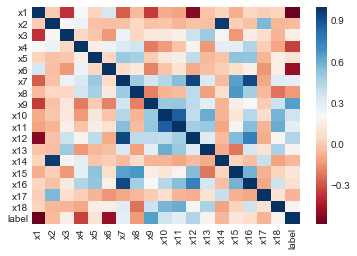

In [10]:
# 对训练集进行分析
# 降维
# 1.采用相关系数进行判断

sns.set_style('whitegrid')
sns.heatmap(data=train.corr(), cmap=sns.color_palette('RdBu', n_colors=200)) # 可以得到有一些特征与标签结果相关性小，所以可以剔除以降维

train_corr = train.corr()
train_corr1 = train_corr[train_corr['label'] <= 0.25][train_corr['label'] >= -0.25]
col_keep = train_corr1.index.tolist()
X_train_keep = X_train[col_keep]
X_test_keep = X_test[col_keep]

In [11]:
# 2.采用LDA进行分析
# （暂不采用PCA（主成分分析法）进行分析，因为PCA适合非监督学习）
# from sklearn.decomposition import PCA
# pca_test = PCA(n_components=data.shape[1])
# pca_test.fit(X_train)
# a = pca_test.explained_variance_ratio_
# plt.plot([i for i in range(data.shape[1])], [np.sum(a[:i+1]) for i in range(data.shape[1])])

# 由于LDA本身就可以作为分类器使用，所以在降维的同时直接也产生了分类模型

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=data.shape[1])
lda.fit(X_train, y_train)
lda_score = lda.score(X_test, y_test)
lda_c_score = lda.decision_function(X_test)

In [12]:
lda_score

0.9776536312849162

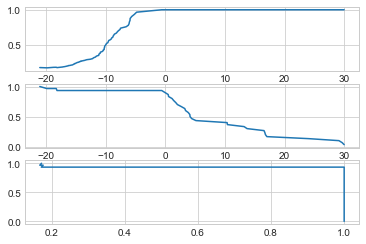

In [13]:
# 另外可使用混淆矩阵以及相关可视化进行模型评估

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

lda_y_pred = lda.predict(X_test)
lda_c_m = confusion_matrix(y_test, lda_y_pred)
lda_p_score = precision_score(y_test, lda_y_pred)
lda_r_score = recall_score(y_test, lda_y_pred)
lda_f1_score = f1_score(y_test, lda_y_pred)
lda_p, lda_r, lda_th = precision_recall_curve(y_test, lda_c_score)

# 精确率、召回率曲线

fig, axe = plt.subplots(3, 1)
axe[0].plot(lda_th, lda_p[:-1])
axe[1].plot(lda_th, lda_r[:-1])
axe[2].plot(lda_p, lda_r)

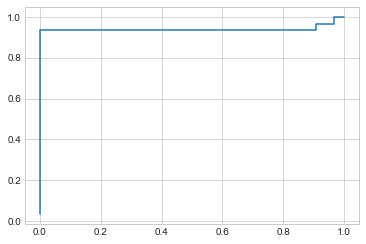

In [14]:
# ROC曲线

lda_fpr, lda_tpr, lda_th = roc_curve(y_test, lda_c_score)
plt.plot(lda_fpr, lda_tpr)
lda_res = roc_auc_score(y_test, lda_c_score)

In [15]:
lda_res

0.9375838926174497

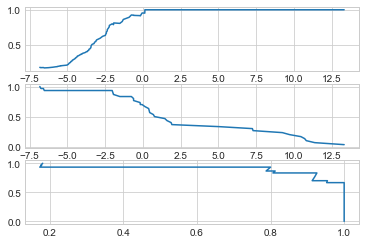

In [16]:
# 使用逻辑回归进行分类以及kNN方法进行分类
# 1.逻辑回归+评估(使用全部特征)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
lr_c_score = lr.decision_function(X_test)

lr_c_m = confusion_matrix(y_test, lr_y_pred)
lr_p_score = precision_score(y_test, lr_y_pred)
lr_r_score = recall_score(y_test, lr_y_pred)
lr_f1_score = f1_score(y_test, lr_y_pred)
lr_p, lr_r, lr_th = precision_recall_curve(y_test, lr_c_score)

# 精确率、召回率曲线

fig, axe = plt.subplots(3, 1)
axe[0].plot(lr_th, lr_p[:-1])
axe[1].plot(lr_th, lr_r[:-1])
axe[2].plot(lr_p, lr_r)

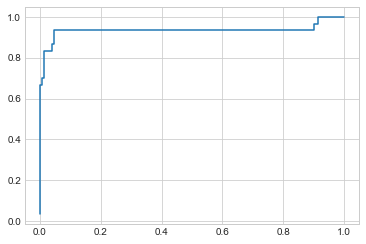

In [17]:
# ROC曲线

lr_fpr, lr_tpr, lr_th = roc_curve(y_test, lr_c_score)
plt.plot(lr_fpr, lr_tpr)
lr_res = roc_auc_score(y_test, lr_c_score)

In [18]:
lr_res

0.9331096196868008

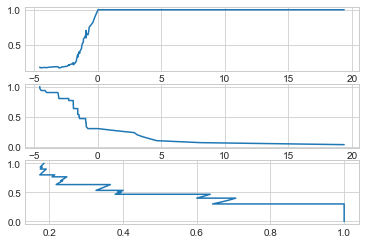

In [19]:
# (使用降维后的数据)

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_train_keep, y_train)
lr2_y_pred = lr2.predict(X_test_keep)
lr2_score = lr2.score(X_test_keep, y_test)
lr2_c_score = lr2.decision_function(X_test_keep)

lr2_c_m = confusion_matrix(y_test, lr2_y_pred)
lr2_p_score = precision_score(y_test, lr2_y_pred)
lr2_r_score = recall_score(y_test, lr2_y_pred)
lr2_f1_score = f1_score(y_test, lr2_y_pred)
lr2_p, lr2_r, lr2_th = precision_recall_curve(y_test, lr2_c_score)
fig, axe = plt.subplots(3, 1)
axe[0].plot(lr2_th, lr2_p[:-1])
axe[1].plot(lr2_th, lr2_r[:-1])
axe[2].plot(lr2_p, lr2_r)

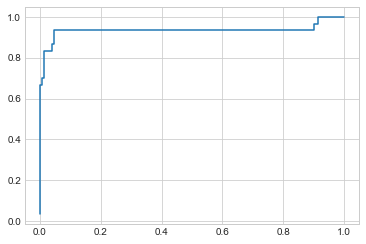

In [20]:
lr2_fpr, lr2_tpr, lr2_th = roc_curve(y_test, lr2_c_score)
plt.plot(lr_fpr, lr_tpr)
lr2_res = roc_auc_score(y_test, lr2_c_score)

In [21]:
lr2_res

# 不理想

0.7149888143176734

In [22]:
# 2.kNN+评估
# (使用网格搜索和交叉验证)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid_param = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 20)]},
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 20)],
        "p": [i for i in range(1, 10)]
    }
]
gridcv_knn = GridSearchCV(knn, grid_param, n_jobs=-1, verbose=10)
gridcv_knn.fit(X_train, y_train)
best_est = gridcv_knn.best_estimator_
beat_pred = best_est.predict(X_test)
best_score_model = gridcv_knn.best_score_
knn_cof = confusion_matrix(y_test, beat_pred)
best_param = gridcv_knn.best_params_
best_c_m = confusion_matrix(y_test, beat_pred)

Fitting 3 folds for each of 190 candidates, totalling 570 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1947s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0987s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0362s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 310 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   26.6s
[Parall

In [23]:
# 最好的模型

best_est

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='distance')

In [24]:
# 最好的模型超参

best_param

{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}

In [25]:
# 最好的模型得分

best_score_model

0.9951807228915662

In [26]:
# 对应的混淆举证

best_c_m

array([[149,   0],
       [  4,  26]], dtype=int64)